In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# https://drive.google.com/file/d/1_vxpjUwqJQXtEWsg2_7Z6hJvsH3pUe8h/view?usp=sharing

In [ ]:
# Load datasets
!pip install --upgrade --no-cache-dir gdown
!gdown  1_vxpjUwqJQXtEWsg2_7Z6hJvsH3pUe8h

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1_vxpjUwqJQXtEWsg2_7Z6hJvsH3pUe8h
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 53.9MB/s]


In [ ]:
df = pd.read_csv('weatherHistory.csv')
# df = df.iloc[:, 3:6]
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# # Remove rows with null values
df = df.dropna()
# Reset the index after removing rows
df = df.reset_index(drop=True)

Number of null values in each column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


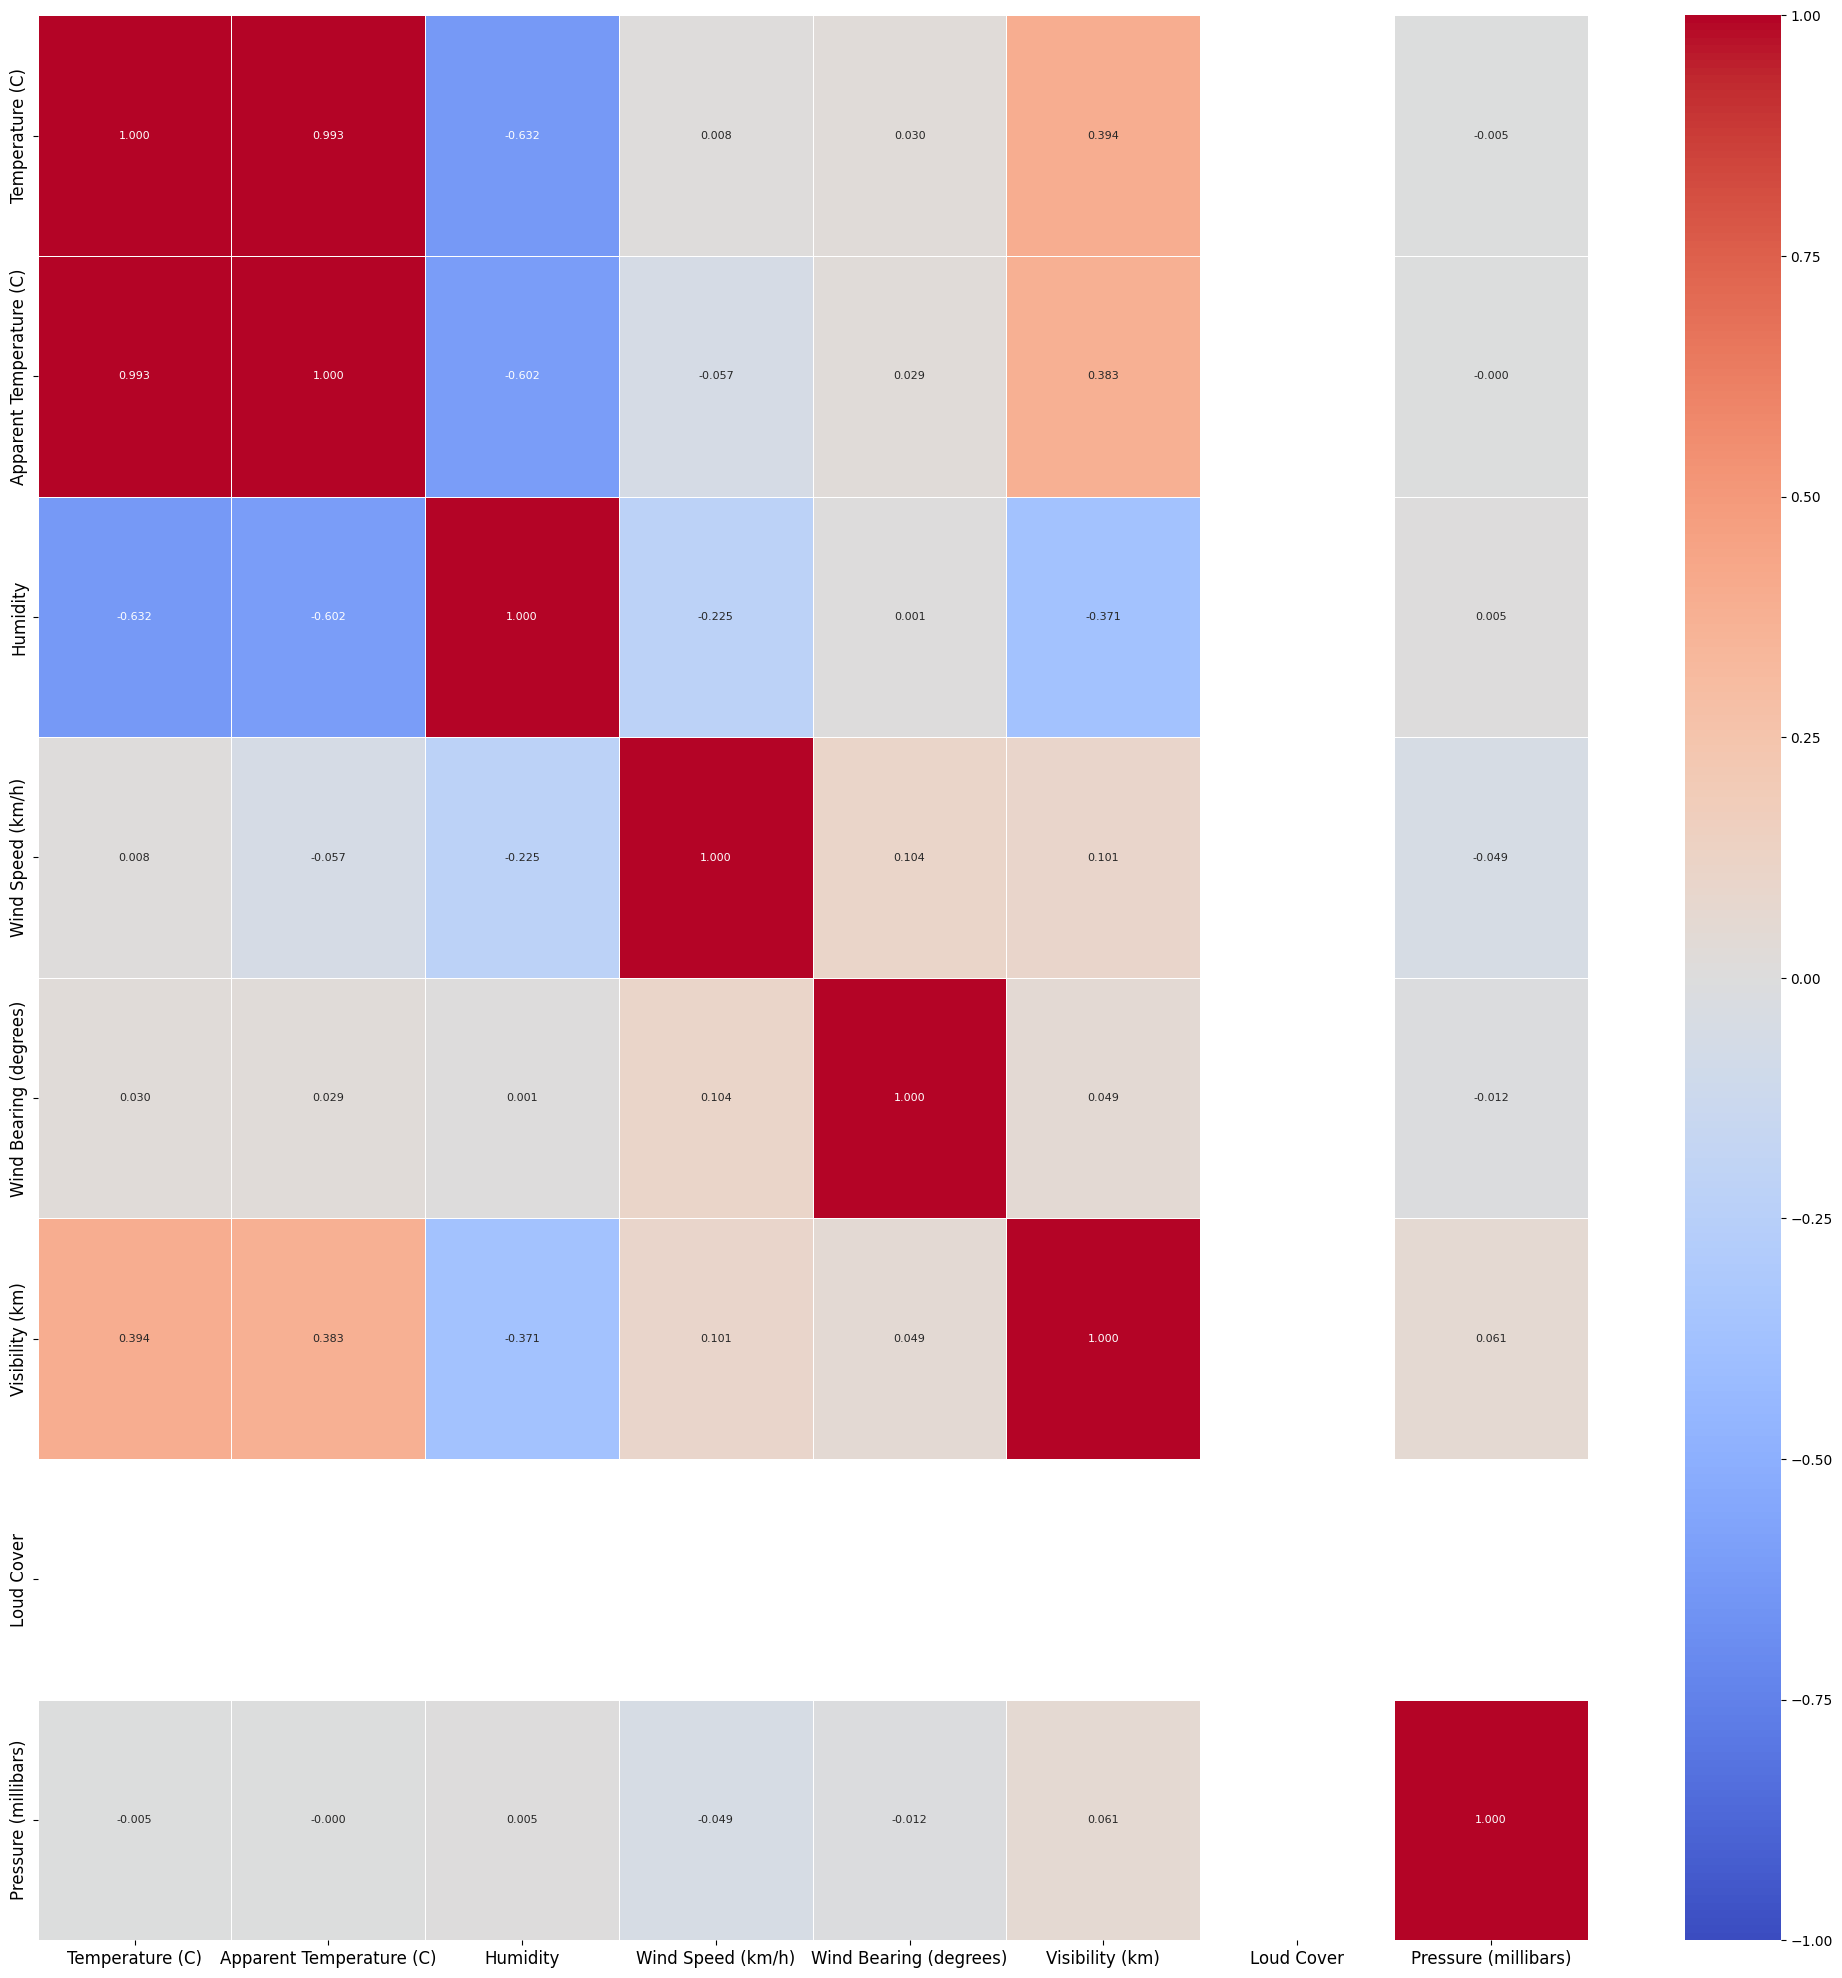

In [ ]:
# Problem 3.1
import seaborn as sns

# Exclude the last column from the DataFrame
df = df.iloc[:,3:11]
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(25,25))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f',
            yticklabels=corr_matrix.columns, vmin=-1, vmax=1)  # Set vmin and vmax
# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')


<ipython-input-5-92796394fd44>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


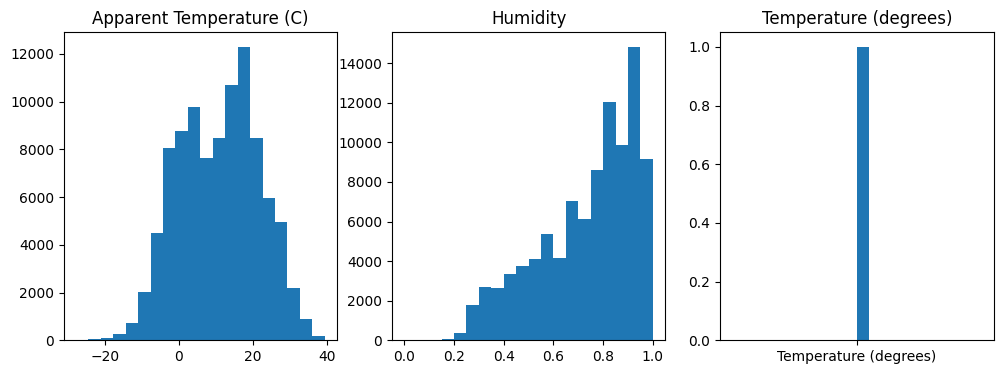

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot()

plt.subplot(1,3,1)
plt.title('Apparent Temperature (C)')
plt.hist(x = 'Apparent Temperature (C)',bins =20,data = df)

plt.subplot(1,3,2)
plt.title('Humidity')
plt.hist(x = 'Humidity',bins =20,data = df)

plt.subplot(1,3,3)
plt.title('Temperature (degrees)')
plt.hist(x = 'Temperature (degrees)',bins =20,data = df)


plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

y = df['Apparent Temperature (C)']
X = df[['Temperature (C)', 'Humidity']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [ ]:
df.isnull().any()
df.isnull().all()

Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
dtype: bool

LS method problem 3.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)


# Initialize and fit the linear regression model using least squares
model = LinearRegressionLS()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("LS Mean Squared Error:", mse)


LS Mean Squared Error: 1.5844767985531005


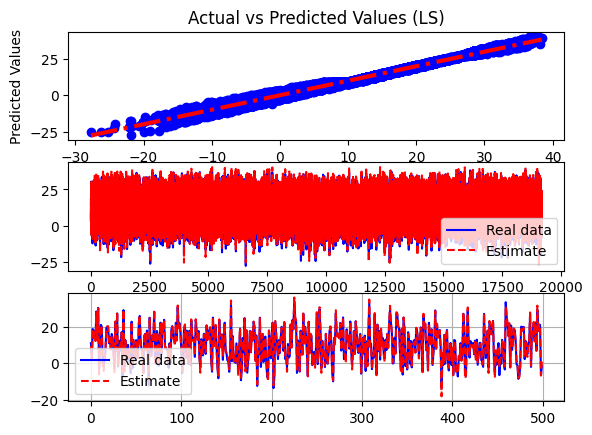

In [ ]:
import matplotlib.pyplot as plt
y_test = np.array(y_test)
# Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-.',linewidth=3, label = 'RealData(ApparentTemperature)' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (LS)')
plt.subplot(312)
plt.plot(y_test, color='blue', label = 'Real data')
plt.plot(y_pred, color='r',linestyle='--' , label = 'Estimate')
plt.legend()
plt.subplot(313)
plt.plot(y_test[0:500], color='blue',label = 'Real data')
plt.plot(y_pred[0:500], color='r',linestyle='--', label = 'Estimate')
plt.legend()
plt.grid(True)
plt.show()


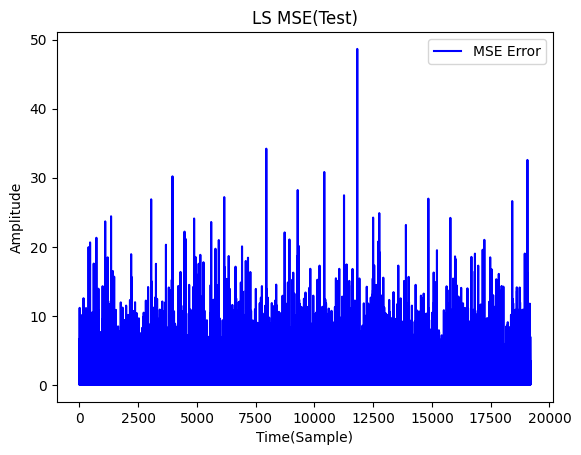

In [ ]:
# Calculate the MSE (test) LS

y_test = np.array(y_test)
mse_test=[]
# mse_test = np.zeros(np.size(e))
for i in range(np.size(y_test)):

  mse = np.mean(np.square(y_test[i]- y_pred[i]))
  mse_test.append(mse)
plt.plot(mse_test, color='blue', label = 'MSE Error')
plt.xlabel('Time(Sample)')
plt.ylabel('Amplitude')
plt.title('LS MSE(Test)')
plt.legend()

**RLS** problem 3.2

Mean Squared Error: 2.1229160504591027


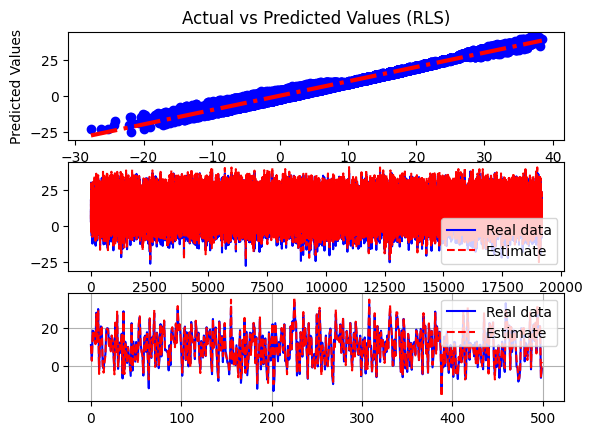

In [ ]:
X = X_train.to_numpy()
y = y_train.to_numpy()
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

if __name__ == "__main__":
    # Generate some sample data
    # np.random.seed(0)
    # X = 2 * np.random.rand(100, 1)
    # y = 4 + 3 * X + np.random.randn(100, 1)

    # Initialize and fit the RLS model
    rls = RecursiveLeastSquares(n_features=X.shape[1])  # Fix the shape of X_train
    errors = rls.fit(X, y)

    # Make predictions
    y_pred_rls = rls.predict(X_test)

    # Calculate Mean Squared Error
    mse = np.mean(np.array(errors)**2)
    print("Mean Squared Error:", mse)

    # Plot the results
    y_test = np.array(y_test)

plt.subplot(311)
plt.scatter(y_test, y_pred_rls, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-.',linewidth=3, label = 'RealData(ApparentTemperature)' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (RLS)')
plt.subplot(312)
plt.plot(y_test, color='blue', label = 'Real data')
plt.plot(y_pred_rls, color='r',linestyle='--' , label = 'Estimate')
plt.legend()
plt.subplot(313)
plt.plot(y_test[0:500], color='blue',label = 'Real data')
plt.plot(y_pred_rls[0:500], color='r',linestyle='--', label = 'Estimate')
plt.legend()
plt.grid(True)
plt.show()


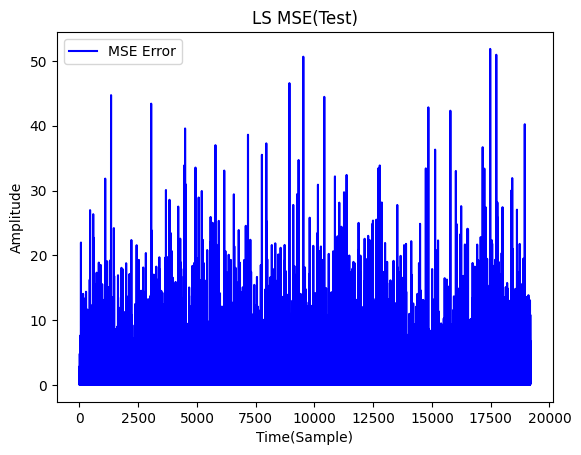

In [ ]:
# Calculate the MSE (test) LS

y_test = np.array(y_test)
mse_test=[]
# mse_test = np.zeros(np.size(e))
for i in range(np.size(y_test)):

  mse = np.mean(np.square(y_test[i]- y_pred_rls[i]))
  mse_test.append(mse)
plt.plot(mse_test, color='blue', label = 'MSE Error')
plt.xlabel('Time(Sample)')
plt.ylabel('Amplitude')
plt.title('LS MSE(Test)')
plt.legend()

**WLS** problem 3.3

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            WLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.787e+06
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:22:27   Log-Likelihood:            -1.2596e+05
No. Observations:               76748   AIC:                         2.519e+05
Df Residuals:                   76745   BIC:                         2.520e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4591      0.027   -162.606      0.0

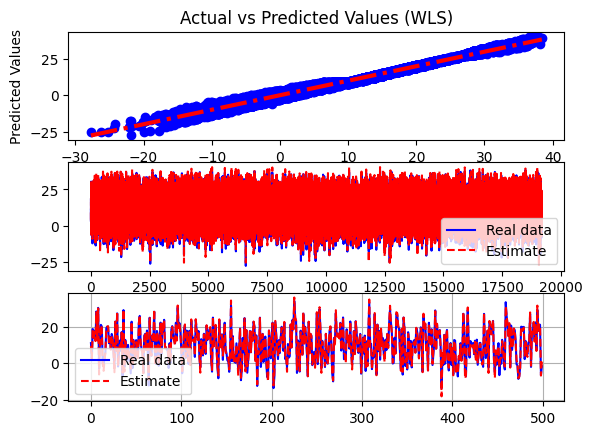

In [ ]:
import numpy as np
import statsmodels.api as sm

# Generate sample data
X = X_train.to_numpy()
y = y_train.to_numpy()

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(X)  # Add intercept term
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()
# y_pred_WLS =
# Predict values for the test dataset
X_test_with_intercept = sm.add_constant(X_test)  # Add intercept term for the test data
y_pred_WLS = np.array(result.predict(X_test_with_intercept))
# Print the model summary
print(result.summary())
plt.subplot(311)
plt.scatter(y_test, y_pred_WLS, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-.',linewidth=3, label = 'RealData(ApparentTemperature)' )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (WLS)')
plt.subplot(312)
plt.plot(y_test, color='blue', label = 'Real data')
plt.plot(y_pred_WLS, color='r',linestyle='--' , label = 'Estimate')
plt.legend()
plt.subplot(313)
plt.plot(y_test[0:500], color='blue',label = 'Real data')
plt.plot(y_pred_WLS[0:500], color='r',linestyle='--', label = 'Estimate')
plt.legend()
plt.grid(True)
plt.show()